In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [4]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [5]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [6]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [1]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

NameError: name 'nn' is not defined

In [2]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

NameError: name 'Generator' is not defined

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.full((size,1),0.85)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.full((size,1),0.1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:40,  2.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


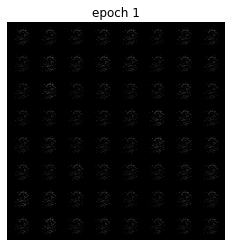

Epoch 1 of 100
Generator loss: 2.03790704, Discriminator loss: 3.18466351


118it [00:39,  2.96it/s]                         


Epoch 2 of 100
Generator loss: 2.06228864, Discriminator loss: 3.06416022


118it [00:39,  2.97it/s]                         


Epoch 3 of 100
Generator loss: 2.04098952, Discriminator loss: 3.04974222


118it [00:47,  2.47it/s]                         


Epoch 4 of 100
Generator loss: 2.01527687, Discriminator loss: 3.03523961


118it [00:41,  2.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


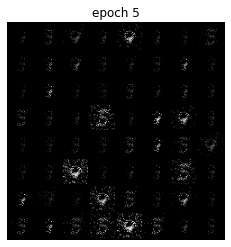

Epoch 5 of 100
Generator loss: 1.98267318, Discriminator loss: 3.06089091


118it [00:41,  2.86it/s]                         


Epoch 6 of 100
Generator loss: 2.04524820, Discriminator loss: 3.04219963


118it [00:40,  2.94it/s]                         


Epoch 7 of 100
Generator loss: 2.02017100, Discriminator loss: 3.03799726


118it [00:39,  2.96it/s]                         


Epoch 8 of 100
Generator loss: 2.00119825, Discriminator loss: 3.04865617


118it [00:39,  3.00it/s]                         


Epoch 9 of 100
Generator loss: 1.97287334, Discriminator loss: 3.06301606


118it [00:39,  2.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


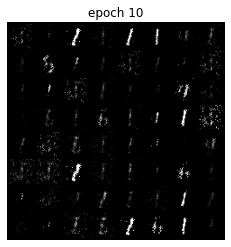

Epoch 10 of 100
Generator loss: 1.98552180, Discriminator loss: 3.07220106


118it [00:39,  2.99it/s]                         


Epoch 11 of 100
Generator loss: 1.97237584, Discriminator loss: 3.07511686


118it [00:40,  2.94it/s]                         


Epoch 12 of 100
Generator loss: 1.96363801, Discriminator loss: 3.08644209


118it [00:40,  2.95it/s]                         


Epoch 13 of 100
Generator loss: 1.98116941, Discriminator loss: 3.07937002


118it [00:39,  2.96it/s]                         


Epoch 14 of 100
Generator loss: 1.93560993, Discriminator loss: 3.11943972


118it [00:39,  2.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


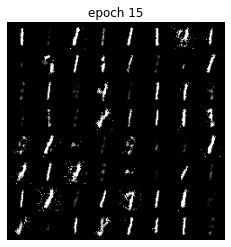

Epoch 15 of 100
Generator loss: 1.92965410, Discriminator loss: 3.12493318


118it [00:38,  3.10it/s]                         


Epoch 16 of 100
Generator loss: 1.91891584, Discriminator loss: 3.14640425


118it [00:40,  2.89it/s]                         


Epoch 17 of 100
Generator loss: 1.92879577, Discriminator loss: 3.14702888


118it [00:38,  3.08it/s]                         


Epoch 18 of 100
Generator loss: 1.88484982, Discriminator loss: 3.18316409


118it [00:42,  2.80it/s]                         


Epoch 19 of 100
Generator loss: 1.87452682, Discriminator loss: 3.22532921


118it [00:44,  2.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


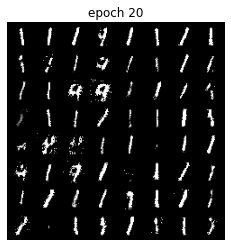

Epoch 20 of 100
Generator loss: 1.87316752, Discriminator loss: 3.25717175


118it [00:39,  3.01it/s]                         


Epoch 21 of 100
Generator loss: 1.87602091, Discriminator loss: 3.22544228


118it [00:40,  2.92it/s]                         


Epoch 22 of 100
Generator loss: 1.86507657, Discriminator loss: 3.23535822


118it [00:39,  2.97it/s]                         


Epoch 23 of 100
Generator loss: 1.86093017, Discriminator loss: 3.27203529


118it [00:42,  2.78it/s]                         


Epoch 24 of 100
Generator loss: 1.85009256, Discriminator loss: 3.27027003


118it [00:39,  2.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


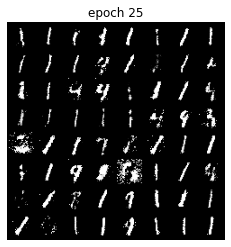

Epoch 25 of 100
Generator loss: 1.85095861, Discriminator loss: 3.26972098


118it [00:38,  3.06it/s]                         


Epoch 26 of 100
Generator loss: 1.81830058, Discriminator loss: 3.31740484


118it [00:39,  2.99it/s]                         


Epoch 27 of 100
Generator loss: 1.83416891, Discriminator loss: 3.30608550


118it [00:38,  3.05it/s]                         


Epoch 28 of 100
Generator loss: 1.78080709, Discriminator loss: 3.36425380


118it [00:43,  2.72it/s]                         


Epoch 29 of 100
Generator loss: 1.80433120, Discriminator loss: 3.35551308


118it [00:39,  2.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


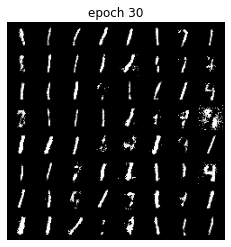

Epoch 30 of 100
Generator loss: 1.79675253, Discriminator loss: 3.34247220


118it [00:41,  2.87it/s]                         


Epoch 31 of 100
Generator loss: 1.77395252, Discriminator loss: 3.37824334


118it [00:40,  2.91it/s]                         


Epoch 32 of 100
Generator loss: 1.74728923, Discriminator loss: 3.40494314


118it [00:41,  2.84it/s]                         


Epoch 33 of 100
Generator loss: 1.75885266, Discriminator loss: 3.42355239


118it [00:40,  2.89it/s]                         


Epoch 34 of 100
Generator loss: 1.74143897, Discriminator loss: 3.41888229


118it [00:40,  2.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


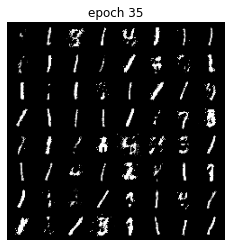

Epoch 35 of 100
Generator loss: 1.75379939, Discriminator loss: 3.40976098


118it [00:41,  2.88it/s]                         


Epoch 36 of 100
Generator loss: 1.74424466, Discriminator loss: 3.43210184


118it [00:40,  2.92it/s]                         


Epoch 37 of 100
Generator loss: 1.75958598, Discriminator loss: 3.41805300


118it [00:40,  2.92it/s]                         


Epoch 38 of 100
Generator loss: 1.75839800, Discriminator loss: 3.43796283


118it [00:42,  2.77it/s]                         


Epoch 39 of 100
Generator loss: 1.70776576, Discriminator loss: 3.44733541


118it [00:41,  2.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


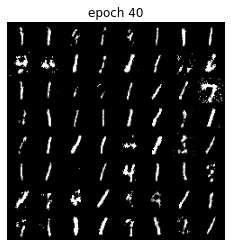

Epoch 40 of 100
Generator loss: 1.73811867, Discriminator loss: 3.43184556


118it [00:41,  2.83it/s]                         


Epoch 41 of 100
Generator loss: 1.74450370, Discriminator loss: 3.42758873


118it [00:43,  2.70it/s]                         


Epoch 42 of 100
Generator loss: 1.75903568, Discriminator loss: 3.41967233


118it [00:42,  2.78it/s]                         


Epoch 43 of 100
Generator loss: 1.74251928, Discriminator loss: 3.42420002


118it [00:41,  2.86it/s]                         


Epoch 44 of 100
Generator loss: 1.76663700, Discriminator loss: 3.42204341


118it [00:42,  2.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


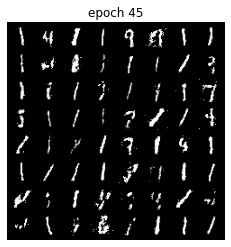

Epoch 45 of 100
Generator loss: 1.75356303, Discriminator loss: 3.43791385


118it [00:44,  2.63it/s]                         


Epoch 46 of 100
Generator loss: 1.72442335, Discriminator loss: 3.45987147


118it [00:41,  2.85it/s]                         


Epoch 47 of 100
Generator loss: 1.74857895, Discriminator loss: 3.44270883


118it [00:44,  2.68it/s]                         


Epoch 48 of 100
Generator loss: 1.76710030, Discriminator loss: 3.42830355


118it [00:42,  2.80it/s]                         


Epoch 49 of 100
Generator loss: 1.77531635, Discriminator loss: 3.42577415


118it [00:39,  3.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


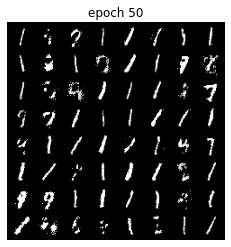

Epoch 50 of 100
Generator loss: 1.74059948, Discriminator loss: 3.45308565


118it [00:41,  2.88it/s]                         


Epoch 51 of 100
Generator loss: 1.72527658, Discriminator loss: 3.45821884


118it [00:41,  2.86it/s]                         


Epoch 52 of 100
Generator loss: 1.74452234, Discriminator loss: 3.44597291


118it [00:40,  2.92it/s]                         


Epoch 53 of 100
Generator loss: 1.74649090, Discriminator loss: 3.45399025


118it [00:38,  3.06it/s]                         


Epoch 54 of 100
Generator loss: 1.72969355, Discriminator loss: 3.47128707


118it [00:39,  2.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


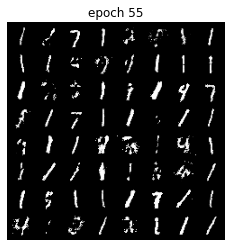

Epoch 55 of 100
Generator loss: 1.73262359, Discriminator loss: 3.47991406


118it [00:39,  3.01it/s]                         


Epoch 56 of 100
Generator loss: 1.73720911, Discriminator loss: 3.48134726


118it [00:39,  3.00it/s]                         


Epoch 57 of 100
Generator loss: 1.75051102, Discriminator loss: 3.47406924


118it [00:39,  3.01it/s]                         


Epoch 58 of 100
Generator loss: 1.73019731, Discriminator loss: 3.49172828


118it [00:40,  2.94it/s]                         


Epoch 59 of 100
Generator loss: 1.72313479, Discriminator loss: 3.47864342


118it [00:40,  2.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


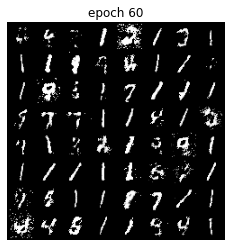

Epoch 60 of 100
Generator loss: 1.76247988, Discriminator loss: 3.45189647


118it [00:39,  3.02it/s]                         


Epoch 61 of 100
Generator loss: 1.74619385, Discriminator loss: 3.45511930


118it [00:39,  2.97it/s]                         


Epoch 62 of 100
Generator loss: 1.74841904, Discriminator loss: 3.45711913


118it [00:39,  3.02it/s]                         


Epoch 63 of 100
Generator loss: 1.72910328, Discriminator loss: 3.47278548


118it [00:39,  3.02it/s]                         


Epoch 64 of 100
Generator loss: 1.74989830, Discriminator loss: 3.46658010


118it [00:40,  2.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


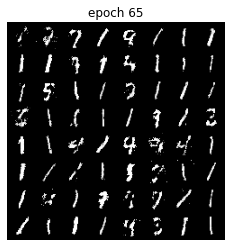

Epoch 65 of 100
Generator loss: 1.74725296, Discriminator loss: 3.47407265


118it [00:43,  2.74it/s]                         


Epoch 66 of 100
Generator loss: 1.73848383, Discriminator loss: 3.46882254


118it [00:42,  2.80it/s]                         


Epoch 67 of 100
Generator loss: 1.72375034, Discriminator loss: 3.48080668


118it [00:39,  3.00it/s]                         


Epoch 68 of 100
Generator loss: 1.71535238, Discriminator loss: 3.50310659


118it [00:43,  2.72it/s]                         


Epoch 69 of 100
Generator loss: 1.72578281, Discriminator loss: 3.49065847


118it [00:40,  2.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


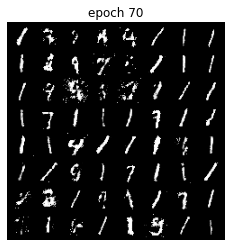

Epoch 70 of 100
Generator loss: 1.73798688, Discriminator loss: 3.49000178


118it [00:39,  3.00it/s]                         


Epoch 71 of 100
Generator loss: 1.74224358, Discriminator loss: 3.47535232


118it [00:39,  2.95it/s]                         


Epoch 72 of 100
Generator loss: 1.74386325, Discriminator loss: 3.45743345


118it [00:39,  2.98it/s]                         


Epoch 73 of 100
Generator loss: 1.73295274, Discriminator loss: 3.47744518


 90%|████████▉ | 105/117 [00:36<00:04,  2.96it/s]

In [29]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    return criterion(output, true_label)
    
    
    ######################################
    

for epoch in range(201):
    loss_g = 0.0
    loss_d = 0.0
    counter = 0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images = data[0]
        fake_images = generator(noise)

        for k in range(4):
            optim_d.zero_grad()
            fake_images = generator(noise)
            true_predictions = discriminator(real_images)
            false_predictions = discriminator(fake_images)
            discriminator_loss_real = discriminator_loss(true_predictions, label_real(real_images.size(0)))
            discriminator_loss_fake = discriminator_loss(false_predictions, label_fake(fake_images.size(0)))
            discriminator_loss_real.backward()
            discriminator_loss_fake.backward()
            loss_d += discriminator_loss_real.item() + discriminator_loss_fake.item()
            optim_d.step()    
        
        ##GENERATOR:
        fake_images = generator(noise)
        optim_g.zero_grad()
        prediction = discriminator(fake_images)
        generator_loss_fake = generator_loss(prediction, label_real(fake_images.size(0)))
        generator_loss_fake.backward()
        optim_g.step()
        
        
        ##Print loss
        loss_g += generator_loss_fake.item()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

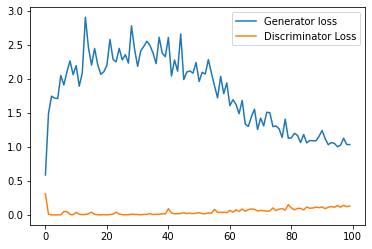

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')